<a href="https://colab.research.google.com/github/afscomercial/big-data-fundamental/blob/main/class-activity-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Select a data-driven company to work with

Procure a dataset that would be interesting for the company chosen

Characterize the dataset

Describe the feautures in your dataset
Charactization of the dataset: number of samples (rows), number of features (columns), continuity of data (neighbouring data points have similar values), signal to noise ratio, manifold number of dimensions of the underlying process that generated the dataset (an audio file has many dimensions, but only a few muscles in our face are used to speak).

Then using the content from slides in Module 1:
including preparation steps you would expect to need for the dataset you chose
the question that you plan to try to answer
the type of analytics that you expect you would need to answer the question you posed about your dataset

# Netflix Userbase Dataset

The data-driven company we choose to work with is Netflix, taking the dataset called "Netflix Userbase Dataset" which contains information of various aspects of user like subscriptions, revenue, account details, and activity.

The dataset does not reflect actual Netflix user data but it can be used for analysis and modeling of user trends.

Source: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset?resource=download

**Question:** What is archetype of person that would pay the highest suscription level and give Netflix the highest revenue?

**Why?** This question will tackle the problem of analyzing data in order to get valuable insights and create an effective marketing strategy, so netflix could focus its campaigns in the customers that give them a higher revenue, knowing its characteristics. As this dataset contains information about netflix's users, its a good opportunity to characterize the type of customer that would give Netflix the highest revenue.

**Other relevant questions:**

* What is the gender that would pay the highest suscription level?
* Which country is the one with most of the users that would pay the highest suscription level?
* What is the age of the users that would pay the highest suscription level?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/netflix.csv')
dataset.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Dataset Characterization

## Features description

* **User ID:** its  unique identifier for the user

* **Subscription Type:**  it is the type of subscription wanteted by the  user(Basic, Premium, Standard)

* **Monthly Revenue**: Revenue generated during the month

* **Join Date:** the date the user joined the  netflix

* **Last Payment Date:** the end date of the payment by the user

* **Country:** the name of the country if the user

* **Age:** the age of the user

* **Gender:** the gender of the user (male, female)

* **Device:** the device on which it is being used by the user (Smartphone,Tablet Laptop, Smart TV)

* **Plan Duration:** the duration of the plan

Number of observations and features:


In [4]:
# Access the shape values. 0 index for rows and index 1 for columns
print(f'Number of observations: {dataset.shape[0]}')
print(f'Number of features: {dataset.shape[1]}')

Number of observations: 2500
Number of features: 10


Types of data and number of each kind:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
#Checking null value of the dataset
dataset.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

Columns and unique values for each one:

In [7]:
unique_values_count = dataset.nunique()
unique_values_count


User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

# Preparation Steps

To answer the questions raised, we can create different types of analisys that would help us identify this target customers, for instance:

* Histograms
* Pair plots
* Correlation index

But first, we need to preprocess the data to manipule it.

As our dataset doesn't have null-values the cleaning process will not include dropping missing values

## Dropping columns

As the "Plan Duration" feature only has 1 value for the entire dataset, in other words, all the users have a monthly suscription, the column could be dropped as it doesn't give any value for the analysis since users cannot be differentiated based on that variable.
User ID variable can also be dropped as it is irrelevant as well.

In [8]:
dataset.drop(['Plan Duration', 'User ID'], axis=1, inplace=True)
dataset.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


## Convert the cualitative features into cuantitative

First we need to convert the cualitative features into unique numerical values that represent each type of value inside each feature and then we can do further analysis

In [9]:
categorical_df = pd.DataFrame(dataset)

In [10]:
le = LabelEncoder()

Converting subscription Type:

In [11]:
categorical_df['Subscription Type'] = le.fit_transform(categorical_df['Subscription Type'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Basic', 1: 'Premium', 2: 'Standard'}


Country:

In [12]:
categorical_df['Country'] = le.fit_transform(categorical_df['Country'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Australia', 1: 'Brazil', 2: 'Canada', 3: 'France', 4: 'Germany', 5: 'Italy', 6: 'Mexico', 7: 'Spain', 8: 'United Kingdom', 9: 'United States'}


Gender:

In [13]:
categorical_df['Gender'] = le.fit_transform(categorical_df['Gender'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Female', 1: 'Male'}


Device:

In [14]:
categorical_df['Device'] = le.fit_transform(categorical_df['Device'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Laptop', 1: 'Smart TV', 2: 'Smartphone', 3: 'Tablet'}


# Data analysis

## Statistics of the data



In [15]:
categorical_df.describe()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.907600,12.508400,5.116400,38.795600,0.497200,1.500400
std,0.835788,1.686851,2.972942,7.171778,0.500092,1.125036
min,0.000000,10.000000,0.000000,26.000000,0.000000,0.000000
25%,0.000000,11.000000,2.000000,32.000000,0.000000,0.000000
50%,1.000000,12.000000,6.000000,39.000000,0.000000,2.000000
75%,2.000000,14.000000,8.000000,45.000000,1.000000,3.000000
max,2.000000,15.000000,9.000000,51.000000,1.000000,3.000000


## Continuity of Data

Analysis of the continuity of data to check for gaps, jumps, and outliers in the data.

array([[<Axes: title={'center': 'Subscription Type'}>,
        <Axes: title={'center': 'Monthly Revenue'}>],
       [<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Device'}>]], dtype=object)

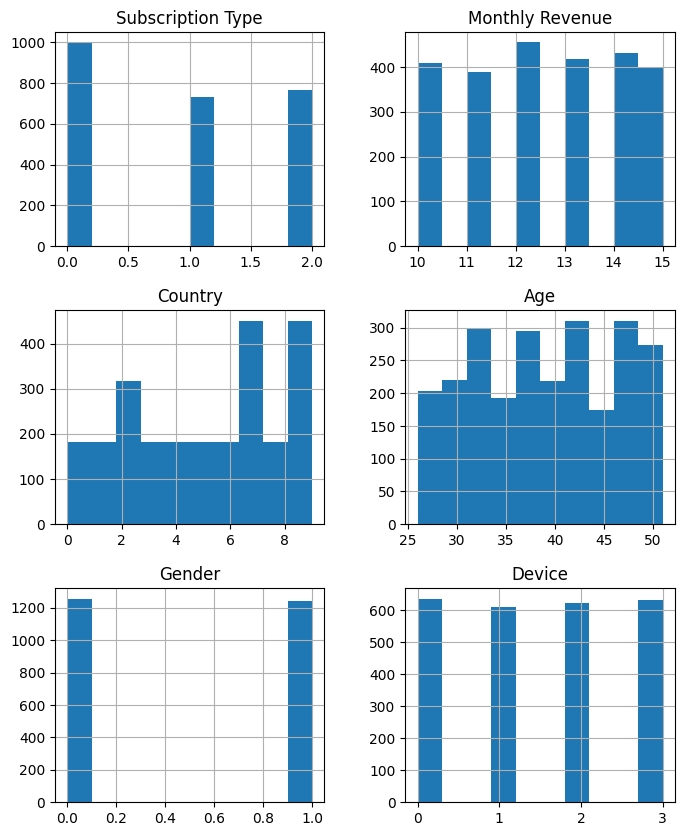

In [16]:
categorical_df.hist(figsize=(8,10))

Continuity of the users through the time: (dates plot)

## Signal to noise ratio

Box plots

<Axes: xlabel='Gender', ylabel='Monthly Revenue'>

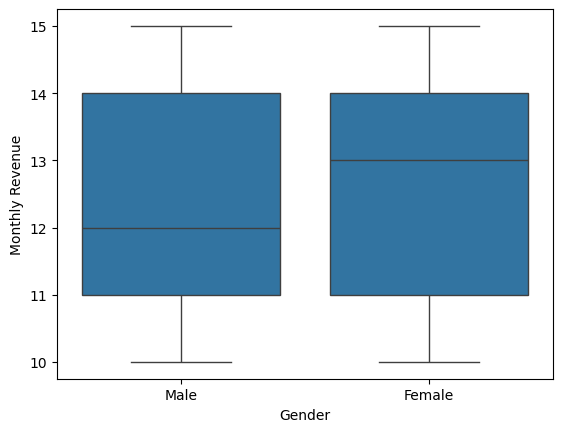

In [17]:
sns.boxplot(x='Gender', y='Monthly Revenue', data = dataset)

<Axes: xlabel='Country', ylabel='Monthly Revenue'>

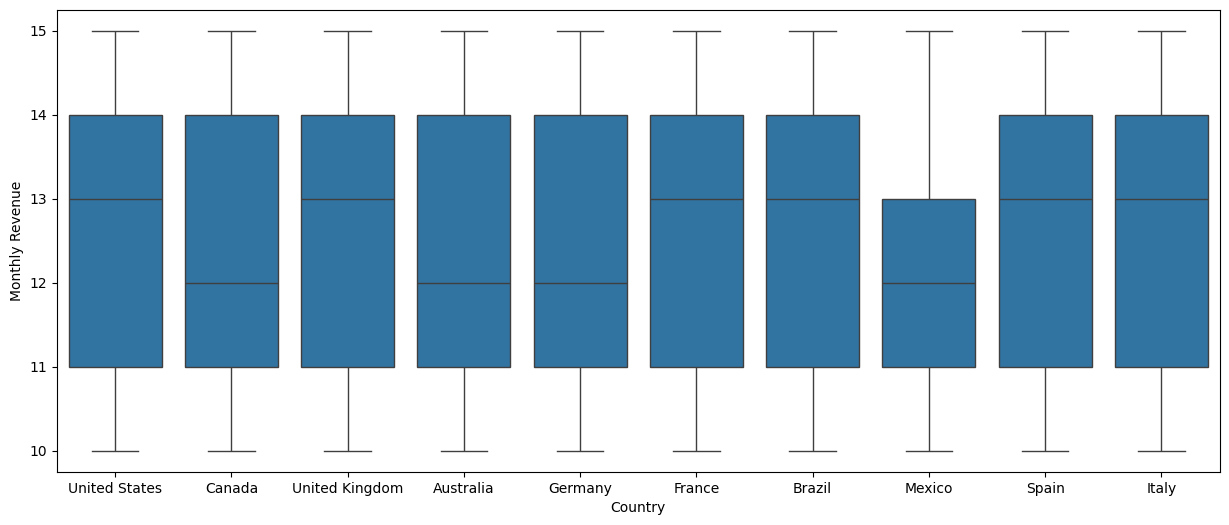

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='Monthly Revenue', data = dataset)

<Axes: xlabel='Device', ylabel='Monthly Revenue'>

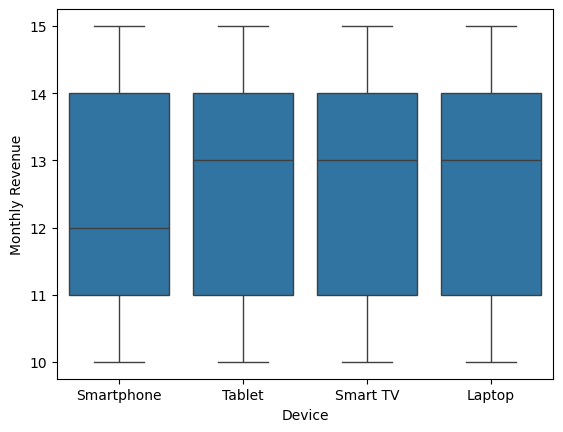

In [19]:
sns.boxplot(x='Device', y='Monthly Revenue', data = dataset)

## Number of dimensions of the underlying process that generated the dataset

For example, an audio file has many dimensions, but only a few muscles in our face are used to speak

Making the analogy with the audio file case, our dataset works with user data, since each observation is one single user with specific information about its netflix usage.

The underlying process that generates the data in this case would be the user registration, so once the user signs up, netflix database gets an update with the new user data. The number of dimensions this process manages consider among others:

* The registration form
* Netflix servers and infrastructure
* User's internet

# Graphics

Pair plot

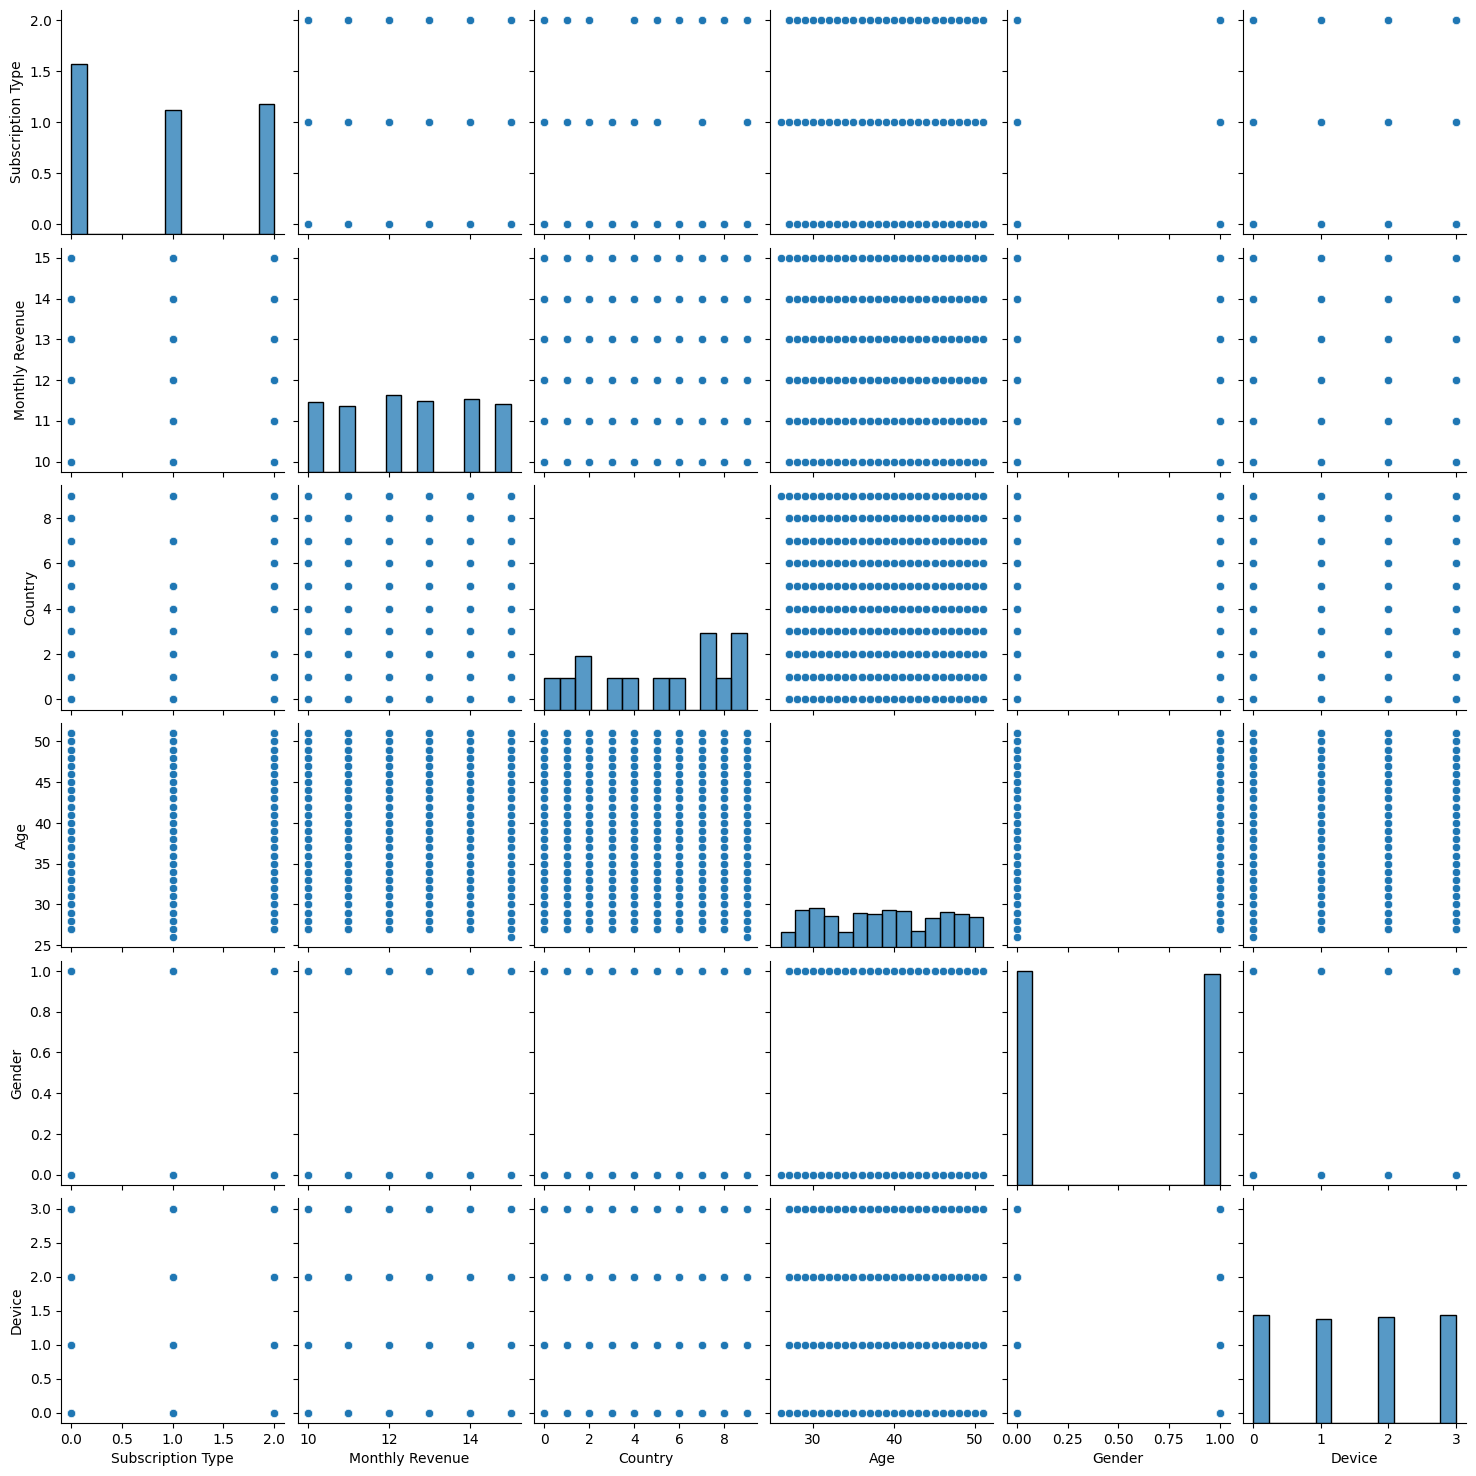

In [20]:
sns.pairplot(categorical_df)

Histogram

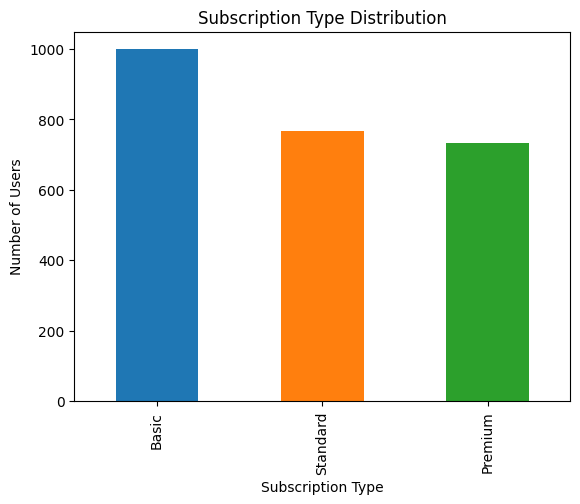

In [21]:
subscription_counts = dataset['Subscription Type'].value_counts()
subscription_counts.plot(kind='bar', title='Subscription Type Distribution', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.show()


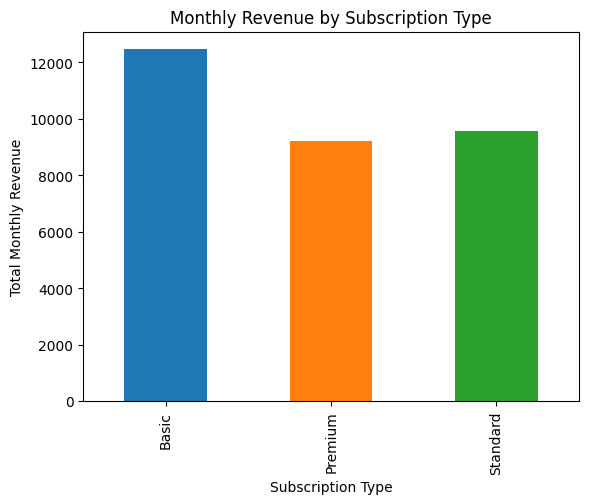

In [22]:
monthly_revenue = dataset.groupby('Subscription Type')['Monthly Revenue'].sum()
monthly_revenue.plot(kind='bar', title='Monthly Revenue by Subscription Type', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue')
plt.show()

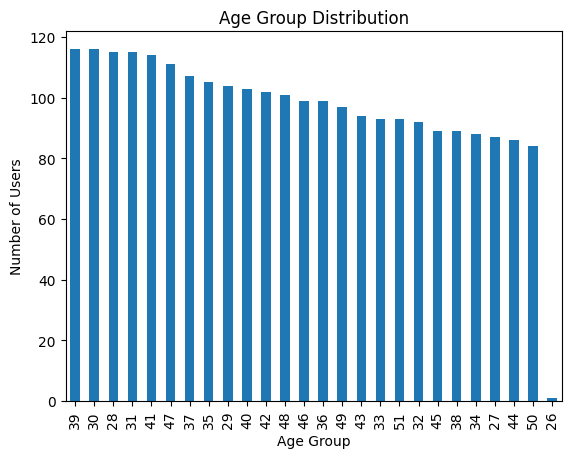

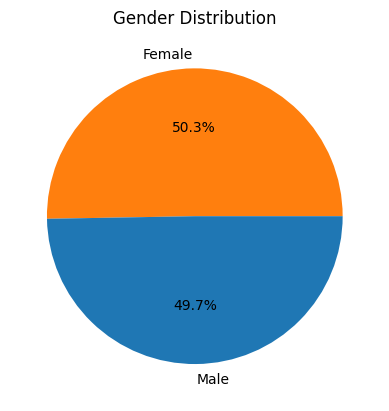

In [23]:
age_distribution = dataset['Age'].value_counts()
age_distribution.plot(kind='bar', title='Age Group Distribution', color='#1f77b4')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

gender_distribution = dataset['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution', colors=['#ff7f0e', '#1f77b4'])
plt.ylabel('')
plt.show()

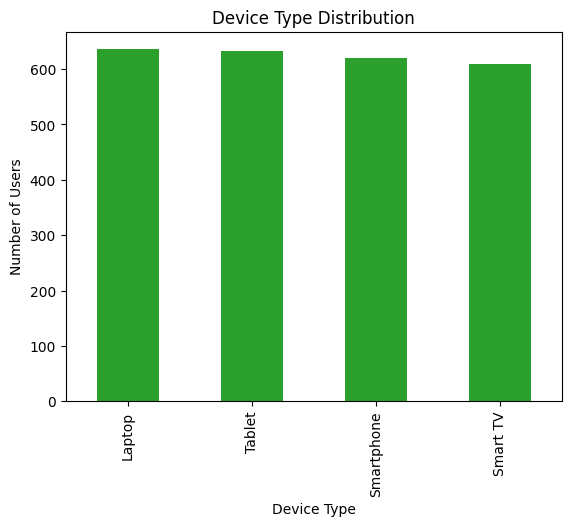

In [24]:
device_counts = dataset['Device'].value_counts()
device_counts.plot(kind='bar', title='Device Type Distribution', color='#2ca02c')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.show()

<ipython-input-25-f7baf1b1c7a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_revenue, x='Monthly Revenue', y='Country', palette='viridis')


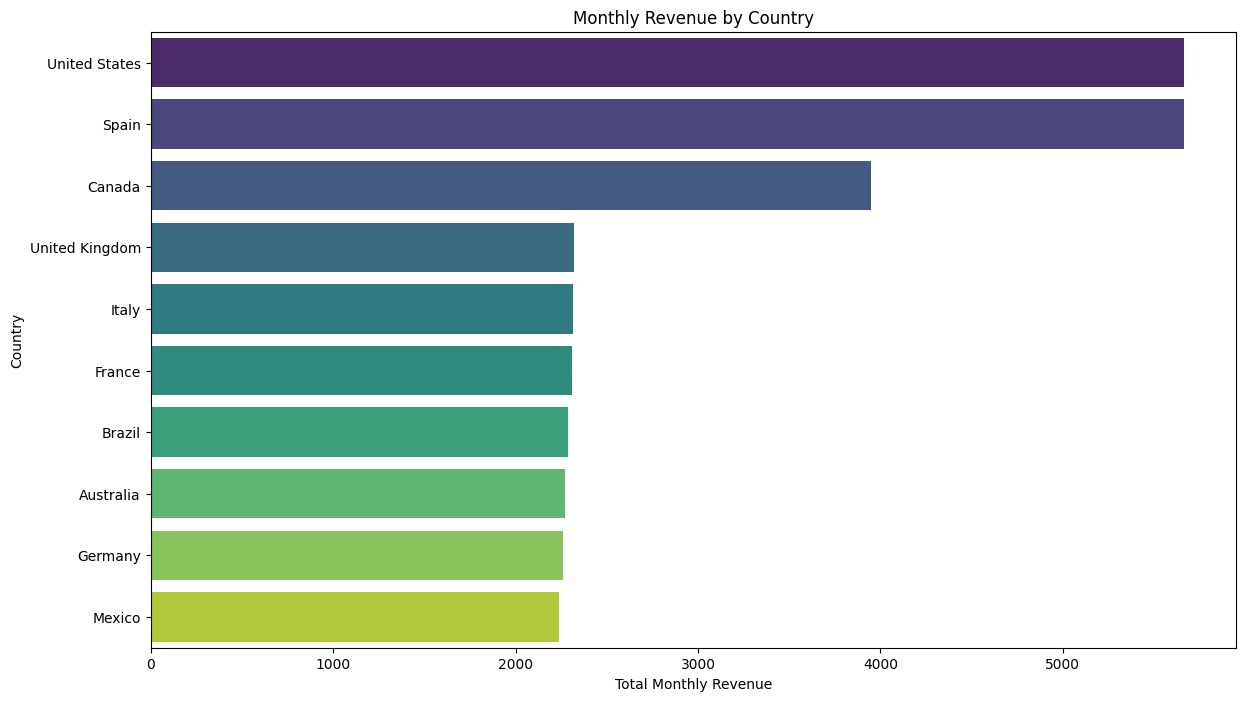

In [25]:
# Group by Country and sum the Monthly Revenue
country_revenue = dataset.groupby('Country')['Monthly Revenue'].sum().reset_index()

# Sort the data by Monthly Revenue in descending order
country_revenue = country_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=country_revenue, x='Monthly Revenue', y='Country', palette='viridis')
plt.title('Monthly Revenue by Country')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Country')
plt.show()

<ipython-input-26-b5ddf972d62f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_revenue, x='Monthly Revenue', y='Age Group', palette='viridis')


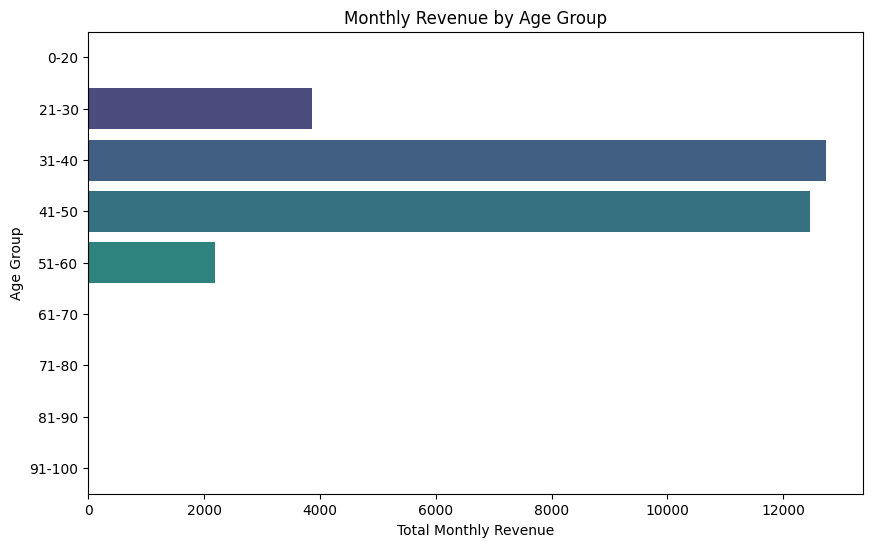

In [26]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Assign age groups to the dataframe
dataset['Age Group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Group and sum the Monthly Revenue
age_revenue = dataset.groupby('Age Group')['Monthly Revenue'].sum().reset_index()

# Sort the data by Monthly Revenue in descending order
age_revenue = age_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=age_revenue, x='Monthly Revenue', y='Age Group', palette='viridis')
plt.title('Monthly Revenue by Age Group')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Age Group')
plt.show()

<ipython-input-27-d02291141ea1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_revenue, x='Monthly Revenue', y='Gender', palette='viridis')


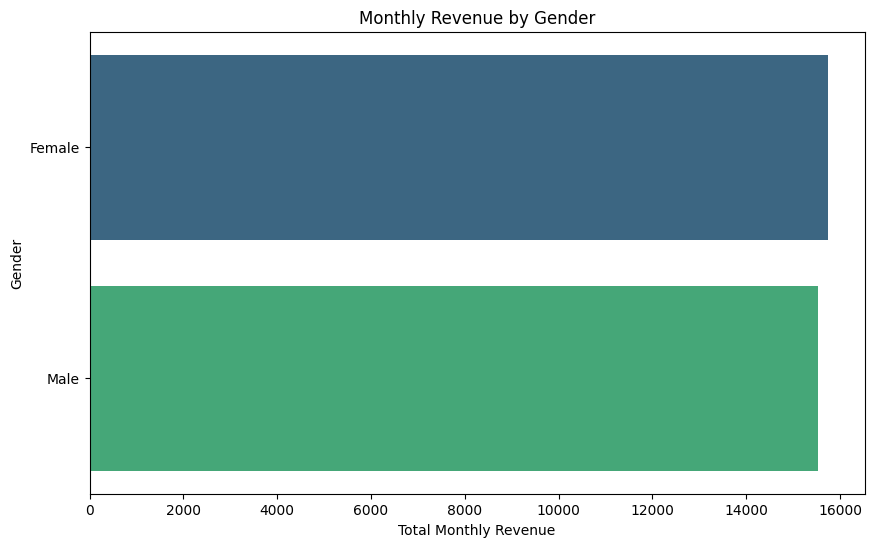

In [27]:
gender_revenue = dataset.groupby('Gender')['Monthly Revenue'].sum().reset_index()


gender_revenue = gender_revenue.sort_values(by='Monthly Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_revenue, x='Monthly Revenue', y='Gender', palette='viridis')
plt.title('Monthly Revenue by Gender')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Gender')
plt.show()

<ipython-input-28-521702f7f4b5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=revenue_by_age_country_type, x='Age', y='Monthly Revenue', hue='Country', palette='viridis', ci=None)


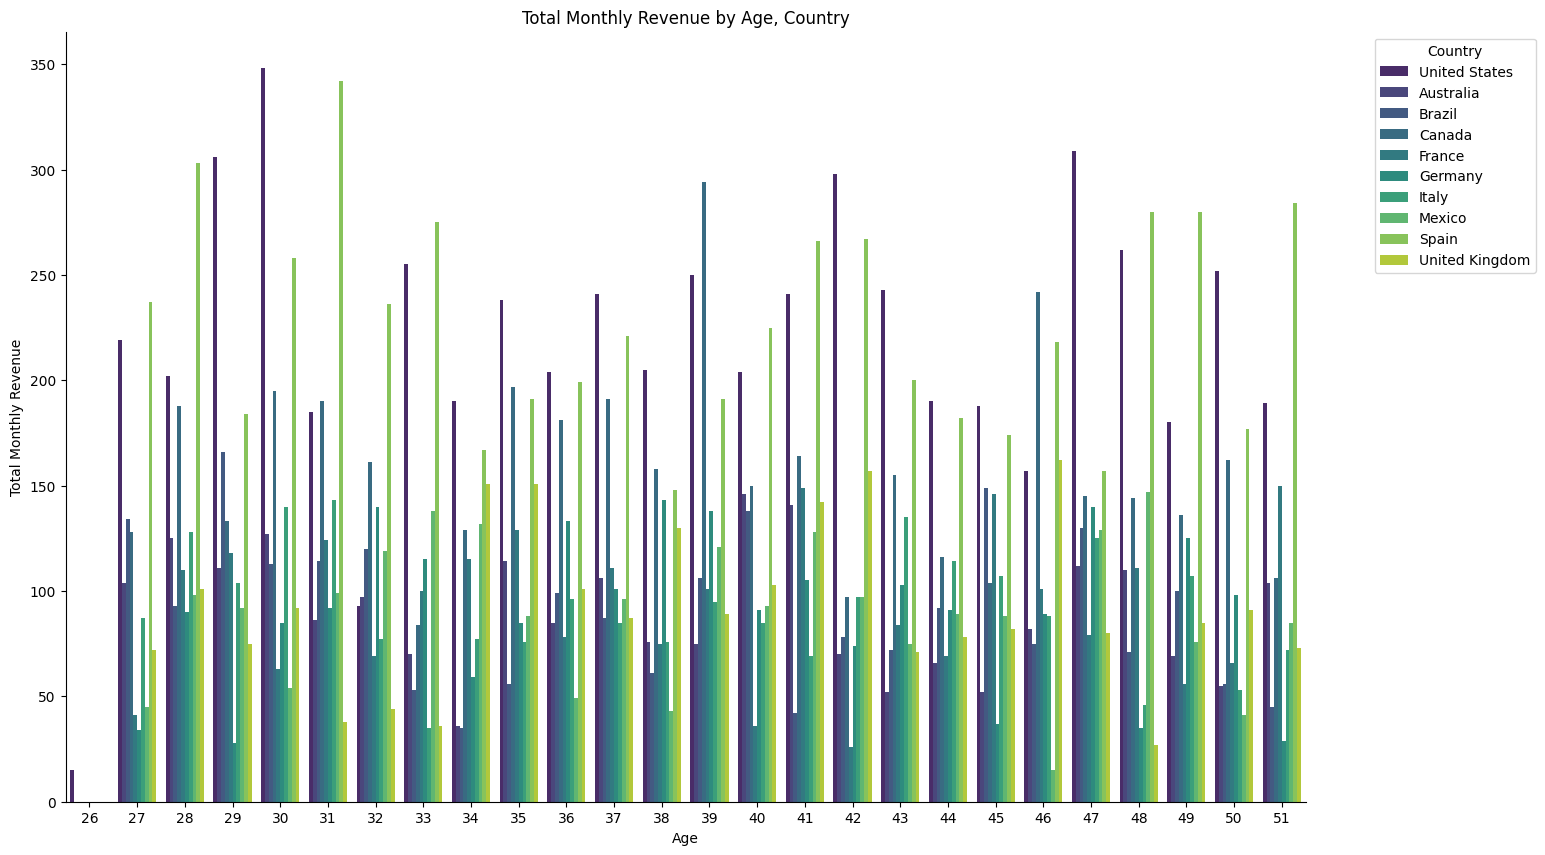

In [28]:
revenue_by_age_country_type = dataset.groupby(['Age', 'Country'])['Monthly Revenue'].sum().reset_index()

# Create the plot
plt.figure(figsize=(16, 10))
sns.barplot(data=revenue_by_age_country_type, x='Age', y='Monthly Revenue', hue='Country', palette='viridis', ci=None)
plt.title('Total Monthly Revenue by Age, Country')
plt.xlabel('Age')
plt.ylabel('Total Monthly Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()

# Business analysis:

* Data Analysis
* Corporate Success Factors,
* KPIs
* Performance Metrics and Indicators

**Data Analysis**

To gain insights from the dataset, we will conduct an analysis focusing on subscription distribution, revenue generation, user demographics, and device preferences. Some plots were created for the analysis:


*  Subscription Distribution: to understand the distribution of subscription types among the users
*   Revenue Analysis:to indicate which subscription type generates the most revenue
*   User Demographics: to show the age group and gender distribution of the users.
*   Device Preferences: to understand which devices are most popular among users.

*   Monthly Revenue by Country: to show revenue by country
*   Monthly Revenue by Age Group: to show revenue by Age
*   Monthly Revenue by Gender: to show revenue by Gender
*   Total Monthly Revenue by Age, Country: To summarize the analysis with the bar graph grouped by age, It can be concluded that the age range of 29 years is the one that is generating the most revenue.









**Corporate Success Factors**

Customer Satisfaction:
Understanding the distribution of subscription types and device preferences helps in tailoring services to enhance customer satisfaction.

Revenue Growth:
By analyzing which subscription types generate the most revenue, strategies can be developed to promote higher-tier subscriptions.

Market Penetration:
Analyzing demographic data helps in identifying potential markets and customizing marketing strategies to attract a diverse user base.

**Key Performance Indicators (KPIs)**

- Subscriber Growth Rate: Percentage increase in the number of subscribers over a specific period.
- Churn Rate: Percentage of users who cancel their subscriptions within a given timeframe.
- Average Revenue Per User (ARPU): Total revenue divided by the number of users.
- Active User Ratio: Ratio of active users to total users.
- Device Usage Statistics: Percentage of users accessing Netflix through different device types.



**Performance Metrics and Indicators**

  - Monthly Active Users (MAU): Number of unique users who have accessed Netflix at least once in the past month.
  - Subscription Renewal Rate: Percentage of users who renew their subscriptions after the plan duration ends.
  - Customer Lifetime Value (CLV): Total revenue expected from a user over the duration of their subscription.

* Business Motivations and Drivers
* impact of IoT, IoE,
* business processes,
* business model canvas